In [1]:

#######################################################
#######################################################
############    COPYRIGHT - DATA SOCIETY   ############
#######################################################
#######################################################

## 12 INTRO TO CLASSIFICATION DAY3 ##

## NOTE: To run individual pieces of code, select the line of code and
##       press ctrl + enter for PCs or command + enter for Macs



In [1]:
main_dir = '/Users/datasociety/Desktop/af-werx'
data_dir = main_dir + "/data"
plot_dir = main_dir + "/plots"

In [2]:
#=================================================-
#### Slide 3: Loading packages  ####

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from matplotlib.legend_handler import HandlerLine2D



In [3]:
#=================================================-
#### Slide 4: Working directory  ####

# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())



/Users/datasociety/Desktop/af-werx/data


In [4]:
#=================================================-
#### Slide 22: Load the dataset  ####

household_poverty = pd.read_csv("costa_rica_poverty.csv")
household_poverty.head()



,household_id,ind_id,rooms,tablet,males_under_12,males_over_12,males_tot,females_under_12,females_over_12,females_tot,...,region_Chorotega,region_pacifico,region_brunca,region_antlantica,region_huetar,urban_zone,rural_zone,age,Target,monthly_rent
0,21eb7fcc1,ID_279628684,3,0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,43,4,190000.0
1,0e5d7a658,ID_f29eb3ddd,4,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,67,4,135000.0
2,2c7317ea8,ID_68de51c94,8,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,92,4,NaN
3,2b58d945f,ID_d671db89c,5,1,0,2,2,1,1,2,...,0,0,0,0,0,1,0,17,4,180000.0
4,2b58d945f,ID_d56d6f5f5,5,1,0,2,2,1,1,2,...,0,0,0,0,0,1,0,37,4,180000.0


In [5]:
#=================================================-
#### Slide 23: Converting the target variable  ####

household_poverty['Target'] = np.where(household_poverty['Target'] <= 3, 'vulnerable', 'non_vulnerable')
print(household_poverty['Target'].head())



0    non_vulnerable
1    non_vulnerable
2    non_vulnerable
3    non_vulnerable
4    non_vulnerable
Name: Target, dtype: object


In [6]:
#=================================================-
#### Slide 24: Data prep: target  ####

print(household_poverty.Target.dtypes)
household_poverty["Target"] = np.where(household_poverty["Target"] == "non_vulnerable", True, False)

# Check class again.
print(household_poverty.Target.dtypes)



object
bool


In [7]:
#=================================================-
#### Slide 26: Subsetting data  ####

costa_tree_subset = household_poverty[['rooms', 'num_adults', 'Target']]
print(costa_tree_subset.head())



   rooms  num_adults  Target
0      3           1    True
1      4           1    True
2      8           1    True
3      5           2    True
4      5           2    True


In [8]:
#=================================================-
#### Slide 27: Summarize the data  ####

print(costa_tree_subset.describe())



             rooms   num_adults
count  9557.000000  9557.000000
mean      4.955530     2.592445
std       1.468381     1.166074
min       1.000000     0.000000
25%       4.000000     2.000000
50%       5.000000     2.000000
75%       6.000000     3.000000
max      11.000000     9.000000


In [9]:
costa_tree_subset.shape

(9557, 3)

In [10]:
#=================================================-
#### Slide 32: Splitting our subset  ####

np.random.seed(1)
X_small = costa_tree_subset.iloc[0:60, 0:2]
y_small = costa_tree_subset.iloc[0:60, 2:3]



In [11]:
#=================================================-
#### Slide 33: Tree: run on small dataset  ####

# Implement the decision tree on X_small.
clf = tree.DecisionTreeClassifier()
clf_fit_small = clf.fit(X_small, y_small)

# Look at our generated model:
print(clf_fit_small)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [12]:
os.chdir(plot_dir)
# Visualize `clf_fit_small`.
feature_cols = ['rooms','num_adults']
dot_data = tree.export_graphviz(
    clf_fit_small,
    feature_names = feature_cols,
    out_file = None
)
graph = graphviz.Source(dot_data)
graph.render("trained_tree")

'trained_tree.pdf'

In [13]:
#=================================================-
#### Slide 39: Split into train and test  ####

# Change working directory back to data directory.
os.chdir(data_dir)

# Split into train and test, use sklearn.
# Create training and test vars.
np.random.seed(1)
X = costa_tree_subset[['rooms','num_adults']]
y = np.array(costa_tree_subset['Target'])

# Split into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(6689, 2) (6689,)
(2868, 2) (2868,)


In [14]:
#=================================================-
#### Slide 40: Fit decision tree and predict  ####

# Implement the decision tree on X_train.
clf = tree.DecisionTreeClassifier()
clf_fit = clf.fit(X_train, y_train)

# Predict on X_test.
y_predict = clf_fit.predict(X_test)



In [15]:
#=================================================-
#### Slide 42: Evaluate model  ####

# Accuracy score.
acc_score = accuracy_score(y_test, y_predict)
print(acc_score)
# Confusion matrix for first model.
cm_tree = confusion_matrix(y_test, y_predict)



0.6610878661087866


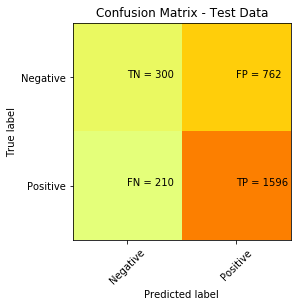

In [16]:
#=================================================-
#### Slide 43: Plot confusion matrix  ####

plt.clf()
plt.imshow(cm_tree, 
           interpolation='nearest', 
           cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + " = " + str(cm_tree[i][j]))
plt.show()


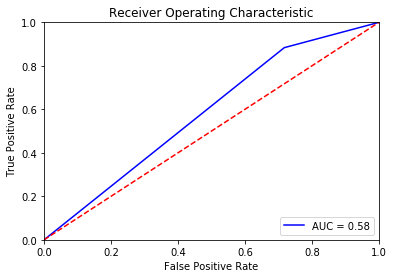

In [17]:
#=================================================-
#### Slide 44: Plot ROC and calculate AUC  ####


# Calculate metrics for ROC (fpr, tpr) and calculate AUC.
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC.
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,
         tpr, 
         'b',
         label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], 
         [0, 1],
         'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [18]:
#=================================================-
#### Slide 45: Save metrics to model_final dataframe  ####

model_final_tree = pickle.load(open("model_final_logistic.sav","rb"))
# Add this final model champion to our dataframe.
model_final_tree = model_final_tree.append({'metrics' : "accuracy" ,
'values' : round(acc_score,4),
'model':'tree_simple_subset' } ,
ignore_index = True)
print(model_final_tree)




    metrics  values                   model
0  accuracy  0.6046                   knn_5
1  accuracy  0.6188        knn_GridSearchCV
2  accuracy  0.6287                  knn_29
3  accuracy  0.6287                  knn_29
4  accuracy  0.6356                logistic
5  accuracy  0.7845  logistic_whole_dataset
6  accuracy  0.7859          logistic_tuned
7  accuracy  0.6611      tree_simple_subset


In [19]:
#=================================================-
#### Slide 47: Exercise 1  ####





In [20]:
#=================================================-
#### Slide 49: View the dataset  ####

costa_tree = household_poverty.drop(['household_id', 'ind_id', 'monthly_rent'], axis = 1)
costa_tree.head()



,rooms,tablet,males_under_12,males_over_12,males_tot,females_under_12,females_over_12,females_tot,ppl_under_12,ppl_over_12,...,region_central,region_Chorotega,region_pacifico,region_brunca,region_antlantica,region_huetar,urban_zone,rural_zone,age,Target
0,3,0,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,43,True
1,4,1,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,67,True
2,8,0,0,0,0,0,1,1,0,1,...,1,0,0,0,0,0,1,0,92,True
3,5,1,0,2,2,1,1,2,1,3,...,1,0,0,0,0,0,1,0,17,True
4,5,1,0,2,2,1,1,2,1,3,...,1,0,0,0,0,0,1,0,37,True


In [21]:
#=================================================-
#### Slide 50: Split into train and test set  ####

# Split the predictors from data.
X = costa_tree.drop('Target', axis = 1)

# Separate target from data.
y = np.array(costa_tree['Target'])
# Set the seed.
np.random.seed(1)
# Split data into training and test set, use a 70 train - 30 test split.
X_train, X_test, y_train, y_test = train_test_split(X,
y,
test_size = .3)




In [22]:
#=================================================-
#### Slide 51: Decision tree: build  ####

# Set up decision tree model.
clf = tree.DecisionTreeClassifier()
print(clf)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [23]:
#=================================================-
#### Slide 52: Decision tree: fit  ####

# Fit the model.
clf_fit = clf.fit(X_train, y_train)



In [24]:
#=================================================-
#### Slide 53: Decision tree: predict  ####

# Predict on X_test.
y_predict = clf_fit.predict(X_test)
print(y_predict)



[ True  True False ...  True  True False]


In [25]:
#=================================================-
#### Slide 54: Decision tree: accuracy  ####

# Compute test model accuracy score.
tree_accuracy_score = metrics.accuracy_score(y_test, y_predict)
print("Accuracy on test data: ", tree_accuracy_score)



Accuracy on test data:  0.9407252440725244


In [26]:
#=================================================-
#### Slide 55: Decision tree: accuracy  ####

# Add this model to our model champion dataframe.
model_final_tree = model_final_tree.append(
    {'metrics' : "accuracy" ,
     'values' : round(tree_accuracy_score,4),
     'model':'tree_all_variables' },
ignore_index = True
)
print(model_final_tree)

    metrics  values                   model
0  accuracy  0.6046                   knn_5
1  accuracy  0.6188        knn_GridSearchCV
2  accuracy  0.6287                  knn_29
3  accuracy  0.6287                  knn_29
4  accuracy  0.6356                logistic
5  accuracy  0.7845  logistic_whole_dataset
6  accuracy  0.7859          logistic_tuned
7  accuracy  0.6611      tree_simple_subset
8  accuracy  0.9407      tree_all_variables


In [27]:
#=================================================-
#### Slide 57: Cross-validation  ####
y = np.array(costa_tree['Target'])
X = costa_tree.drop('Target', axis = 1)
clf = tree.DecisionTreeClassifier()
print(cross_val_score(clf, 
                      X, 
                      y, 
                      cv = 10)
     )



[0.67816092 0.63179916 0.68410042 0.67468619 0.67782427 0.65376569
 0.64502618 0.35183246 0.52879581 0.62931937]


In [28]:
#=================================================-
#### Slide 58: Highly-correlated variables  ####

print(costa_tree.shape)
costa_hc = costa_tree.drop('Target', axis = 1)



(9557, 81)


In [29]:
#=================================================-
#### Slide 59: Highly-correlated variables  ####

# Create correlation matrix.
corr_matrix = costa_hc.corr().abs()
# Select upper triangle of correlation matrix.
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find features with correlation greater than 0.7.
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(to_drop)
# Drop the features we identified.
costa_tree = costa_tree.drop(costa_tree[to_drop], axis=1)
print(costa_tree.shape)



['males_tot', 'females_tot', 'ppl_under_12', 'ppl_over_12', 'ppl_total', 'floor_cement', 'electric_coop', 'toilet_septic', 'cookenergy_gas', 'trash_burn', 'wall_good', 'roof_good', 'floor_good', 'female', 'num_child', 'num_adults', 'num_hh_total', 'educ_none', 'bedrooms', 'rural_zone']
(9557, 61)


In [30]:
pickle.dump(costa_tree, open('costa_no_hc.sav', 'wb'))

In [30]:
#=================================================-
#### Slide 60: Highly-correlated variables  ####

X = costa_tree.drop('Target', axis = 1)
y = np.array(costa_tree['Target'])
clf = tree.DecisionTreeClassifier()
print(cross_val_score(clf, X, y, cv = 10))



[0.70114943 0.74476987 0.70606695 0.62552301 0.7123431  0.62343096
 0.61989529 0.43246073 0.50890052 0.69424084]


In [31]:
#=================================================-
#### Slide 62: Exercise 2  ####





In [34]:
#=================================================-
#### Slide 65: Define an optimal number function  ####

# Define function that will determine the optimal number for each parameter.
def optimal_parameter(values,test_results):
    best_test_value = max(test_results)
    best_test_index = test_results.index(best_test_value)
    best_value = values[best_test_index]
    return(best_value)



In [35]:
#=================================================-
#### Slide 67: Optimize: max depth  ####

# Max depth:
max_depths = np.linspace(1, 32, 32, endpoint = True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth = max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)

    # Add AUC score to previous train results
    train_results.append(acc_train)
    y_pred = dt.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)

    # Add AUC score to previous test results
    test_results.append(acc_test)

# Store optimal max_depth.
optimal_max_depth = optimal_parameter(max_depths, test_results)



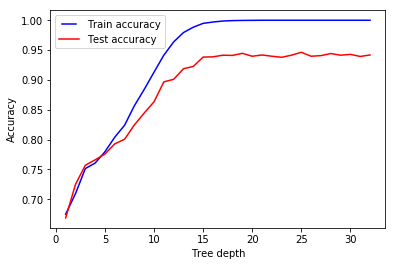

In [36]:
#=================================================-
#### Slide 68: Plot: max depth  ####

# Plot max depth over 1 - 32.
line1, = plt.plot(max_depths, train_results, 'b', label = "Train accuracy")
line2, = plt.plot(max_depths, test_results, 'r', label = "Test accuracy")
plt.legend(handler_map={line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.show()



In [37]:
#=================================================-
#### Slide 70: Optimize: min samples split  ####

min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint = True)
train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split = min_samples_split)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    # Add AUC score to previous train results
    train_results.append(acc_train)
    y_pred = dt.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    # Add AUC score to previous test results
    test_results.append(acc_test)

# Store optimal max_depth.
optimal_min_samples_split = optimal_parameter(min_samples_splits, test_results)



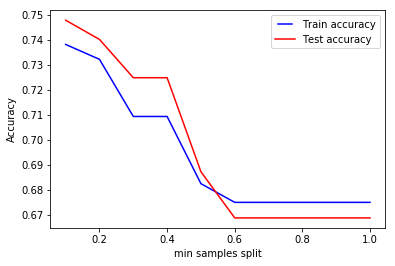

In [38]:
#=================================================-
#### Slide 71: Plot: min samples split  ####

# Plot min_sample split.
line1, = plt.plot(min_samples_splits, train_results, 'b', label =  "Train accuracy")
line2, = plt.plot(min_samples_splits, test_results, 'r', label =  "Test accuracy")
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('min samples split')
plt.show()




In [39]:
#=================================================-
#### Slide 73: Optimize: min samples leaf  ####

# Min_samples_leaf:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint = True)
train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    # Add AUC score to previous train results
    train_results.append(acc_train)
    y_pred = dt.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    # Add AUC score to previous test results
    test_results.append(acc_test)

optimal_min_samples_leafs = optimal_parameter(min_samples_leafs, test_results)



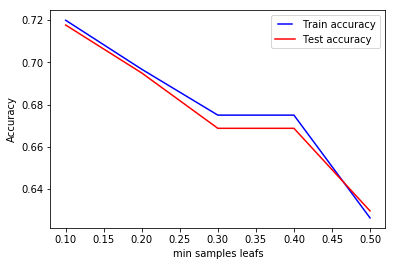

In [38]:
#=================================================-
#### Slide 74: Plot: min samples leaf  ####

# Plot min_sample split.
line1, = plt.plot(min_samples_leafs, train_results, 'b', label =  "Train accuracy")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label =  "Test accuracy")
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('min samples leafs')
plt.show()




In [39]:
#=================================================-
#### Slide 76: Optimize: max features  ####

# Max_features:
max_features = list(range(1, X.shape[1]))
train_results = []
test_results = []

for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features = max_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    acc_train = accuracy_score(y_train, train_pred)
    # Add AUC score to previous train results
    train_results.append(acc_train)
    y_pred = dt.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)
    # Add AUC score to previous test results
    test_results.append(acc_test)

optimal_max_features = optimal_parameter(max_features, test_results)



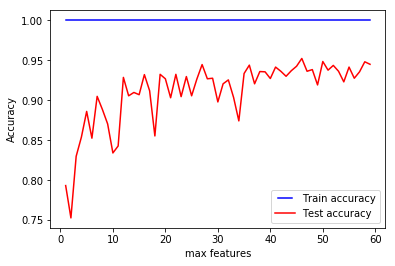

In [40]:
#=================================================-
#### Slide 77: Plot: max features  ####

# Plot min_sample split.
line1, = plt.plot(max_features, train_results, 'b', label = "Train accuracy")
line2, = plt.plot(max_features, test_results, 'r', label = "Test accuracy")
plt.legend(handler_map = {line1: HandlerLine2D(numpoints = 2)})
plt.ylabel('Accuracy')
plt.xlabel('max features')
plt.show()



In [41]:
#=================================================-
#### Slide 79: Optimized model  ####

print("The optimal max depth is:", optimal_max_depth)
print("The optimal min samples split is:", optimal_min_samples_split)
print("The optimal min samples leaf is:", optimal_min_samples_leafs)
print("The optimal max features is:", optimal_max_features)



The optimal max depth is: 24.0
The optimal min samples split is: 0.1
The optimal min samples leaf is: 0.1
The optimal max features is: 46


In [42]:
#=================================================-
#### Slide 80: Build optimized model  ####

# Set the seed.
np.random.seed(1)

# Implement the decision tree on X_train.
clf_optimized = tree.DecisionTreeClassifier(max_depth = optimal_max_depth,
min_samples_split = optimal_min_samples_split,
min_samples_leaf = optimal_min_samples_leafs,
max_features = optimal_max_features)

# We can now see our optimized features where before they were just default:
print(clf_optimized)

clf_optimized_fit = clf_optimized.fit(X_train, y_train)



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=24.0,
            max_features=46, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [43]:
#=================================================-
#### Slide 81: Predict with optimized model  ####

# Predict on X_test.
y_predict_optimized = clf_optimized_fit.predict(X_test)

# Get the accuracy score.
acc_score_tree_optimized = accuracy_score(y_test, y_predict_optimized)

print(acc_score_tree_optimized)



0.7182705718270572


In [44]:
#=================================================-
#### Slide 83: Predict and save results  ####

# Add the optimized model to our dataframe.
model_final_tree = model_final_tree.append(
{'metrics' : "accuracy" ,
'values' : round(acc_score_tree_optimized,4),
'model':'tree_all_variables_optimized' } ,
ignore_index = True)
print(model_final_tree)



    metrics  values                         model
0  accuracy  0.6046                         knn_5
1  accuracy  0.6188              knn_GridSearchCV
2  accuracy  0.6287                        knn_29
3  accuracy  0.6356                      logistic
4  accuracy  0.7845        logistic_whole_dataset
5  accuracy  0.7856                logistic_tuned
6  accuracy  0.6611            tree_simple_subset
7  accuracy  0.9407            tree_all_variables
8  accuracy  0.7183  tree_all_variables_optimized


In [33]:
pickle.dump(model_final_tree, open("model_final_tree_all.sav","wb"))